<a id=contents></a>

# Exploratory Data Analysis of Natural Language Processing Jobs
## Our clean data at a glance


[1. Visualizing and exploring the Job Title field](#insp)

[2. EDA](#eda)

[3. Summary of findings](#conc)

In [1]:

import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as shc

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("darkgrid")

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import nltk
from sklearn.linear_model import LogisticRegression
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from matplotlib import cm
import numpy as np
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.metrics import f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
from sklearn.tree import DecisionTreeClassifier
import string
# !pip install wordcloud
import wordcloud
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import re
tokenizer = RegexpTokenizer(r'\b\w{3,}\b')
stop_words = list(set(stopwords.words("english")))
stop_words += list(string.punctuation)

import warnings
warnings.filterwarnings('ignore')


import functions as fn

%load_ext autoreload
%autoreload 2

In [60]:
# updating our stop word list to include NLP title terms like 'language', 'natural'
nlp_stop_word_lst = fn.gen_stopwords(['data', 'experience', 'learning', 'science', 'machine', 
                                      'work', 'company', 'role', 'the', 'skills', ' data',
                                      '000', 'data', 'the', 'join', 'you''engineer', 
                                      'scientist', 'software', 
                                      'science', 'machine', 'data', 'analyst', 
                                      'experience', 'work', 'working', 
                                      'language', 'natural', 'nlp', 
                                     'processing'])

<a id=insp ><a/> 

## 1. ETL and defining what are NLP jobs
    
[LINK to table of contents](#contents)

After extracting our data, it it important that we define what we mean by Natural Language Processing (NLP) jobs. A significant portion of the other batches we retrieved, where our search terms were 'data scientist' and 'machine learning engineer' will have contained NLP as part of the description and maybe even the title. It's not uncommon to expect a lot of ML and DS jobs to include some features of NLP work, alongside other parts of the job. However, since we're looking here for a very specific type of job, where the role is *centred* on NLP. How do we go about selecting such a subset of jobs accurately? 

My choice is to select the subset of jobs that contain some variation of 'NLP'/ 'Natural Language' in them. My reasoning is that if a job post is truly centred on that function within a company then it would be mentioned in the title. In the case where jobs simply say something akin to "Data Scientist - NLP preferable" I would still include this since it's likely that the skills mentioned after will be highly relevant to our search. 

In [6]:
df = pd.read_csv('clean_nlp_data.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,company,job_title,job_descr,job_search_term,job_location,job_url,salary_from_page_source_as_stated,salary_from_page_source_conv_hourly,salary_from_page_source_time_period,Num_reviews
0,Kubrick Group-London SE1,Machine Learning Engineer Graduate Scheme,Would you love explore career Data Science Eng...,natural language processing,London,https://www.indeed.co.uk/pagead/clk?mo=r&ad=-6...,32000.0,NaN,NaN,NaN
1,Securium LTD-Surrey,Software Engineer / Developer,Securium advanced cyber focused developing sec...,natural language processing,London,https://www.indeed.co.uk/pagead/clk?mo=r&ad=-6...,NaN,NaN,NaN,NaN
2,Digital insight-London N1,Natural Language Processing (NLP),specialise and differentiate our ability extra...,natural language processing,London,https://www.indeed.co.uk/rc/clk?jk=bfd3b0a1b6f...,NaN,NaN,NaN,NaN
3,Facebook-London,"Research Scientist, Natural Language Processin...",Facebook mission give people the power and bri...,natural language processing,London,https://www.indeed.co.uk/rc/clk?jk=2e174837e3a...,NaN,NaN,NaN,579.0
4,Evi Technologies Limited-London,Applied Scientist - Information Retrieval and ...,Machine Learning related disciplineStrong publ...,natural language processing,London,https://www.indeed.co.uk/rc/clk?jk=edc11c5d777...,NaN,NaN,NaN,63542.0


In [19]:
def does_it_include_nlp(job_title):
    if re.findall(r'langua', job_title.lower()):
        return 1
    elif re.findall(r'nlp', job_title.lower()):
        return 1
    elif re.findall(r'linguis', job_title.lower()):
        return 1
    elif re.findall(r'text', job_title.lower()):
        return 1
    else:
        return 0

test_str = ' Research Scientist, Natural Language'

does_it_include_nlp(test_str)

1

In [20]:
df['title_inc_nlp'] = df.job_title.apply(does_it_include_nlp)
df.head()

,company,job_title,job_descr,job_search_term,job_location,job_url,salary_from_page_source_as_stated,salary_from_page_source_conv_hourly,salary_from_page_source_time_period,Num_reviews,title_inc_nlp
0,Kubrick Group-London SE1,Machine Learning Engineer Graduate Scheme,Would you love explore career Data Science Eng...,natural language processing,London,https://www.indeed.co.uk/pagead/clk?mo=r&ad=-6...,32000.0,NaN,NaN,NaN,0
1,Securium LTD-Surrey,Software Engineer / Developer,Securium advanced cyber focused developing sec...,natural language processing,London,https://www.indeed.co.uk/pagead/clk?mo=r&ad=-6...,NaN,NaN,NaN,NaN,0
2,Digital insight-London N1,Natural Language Processing (NLP),specialise and differentiate our ability extra...,natural language processing,London,https://www.indeed.co.uk/rc/clk?jk=bfd3b0a1b6f...,NaN,NaN,NaN,NaN,1
3,Facebook-London,"Research Scientist, Natural Language Processin...",Facebook mission give people the power and bri...,natural language processing,London,https://www.indeed.co.uk/rc/clk?jk=2e174837e3a...,NaN,NaN,NaN,579.0,1
4,Evi Technologies Limited-London,Applied Scientist - Information Retrieval and ...,Machine Learning related disciplineStrong publ...,natural language processing,London,https://www.indeed.co.uk/rc/clk?jk=edc11c5d777...,NaN,NaN,NaN,63542.0,1


In [24]:
df[['job_title', 'title_inc_nlp']].head(20)

,job_title,title_inc_nlp
0,Machine Learning Engineer Graduate Scheme,0
1,Software Engineer / Developer,0
2,Natural Language Processing (NLP),1
3,"Research Scientist, Natural Language Processin...",1
4,Applied Scientist - Information Retrieval and ...,1
5,Quantitative Researcher in Natural Language Pr...,1
6,Research Fellow in Natural Language Processing,1
7,Junior Machine Learning Consultant,0
8,Natural Language Processing Engineer PhD,1
9,Natural Language Processing Engineers,1


In [22]:
nlp_df = df.loc[df.title_inc_nlp == 1]
nlp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 2 to 121
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   company                              17 non-null     object 
 1   job_title                            17 non-null     object 
 2   job_descr                            17 non-null     object 
 3   job_search_term                      17 non-null     object 
 4   job_location                         17 non-null     object 
 5   job_url                              17 non-null     object 
 6   salary_from_page_source_as_stated    5 non-null      float64
 7   salary_from_page_source_conv_hourly  0 non-null      float64
 8   salary_from_page_source_time_period  0 non-null      float64
 9   Num_reviews                          10 non-null     float64
 10  title_inc_nlp                        17 non-null     int64  
dtypes: float64(4), int64(1), object(6

And right there we can see that we have a significantly smaller group of job posts. Let's analyse the 17 we have. 

<a id='eda'></a>

## 2. EDA

[LINK to table of contents](#contents)

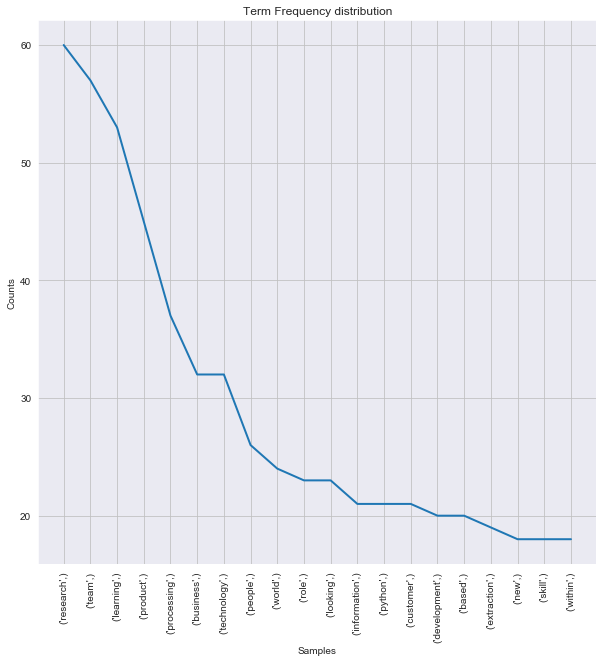

In [32]:
fn.plot_freqdist_from_series(nlp_df.job_descr, tokenizer, nlp_stop_word_lst);

* 'research' is mentioned heavily (~60 times across 17 jobs) - this could be an indication that NLP specific jobs often have a focus on bringing new ideas into the hiring company and scouting new solutions, OR that candidates should have experience of research in NLP. Let's look at bigrams and trigrams

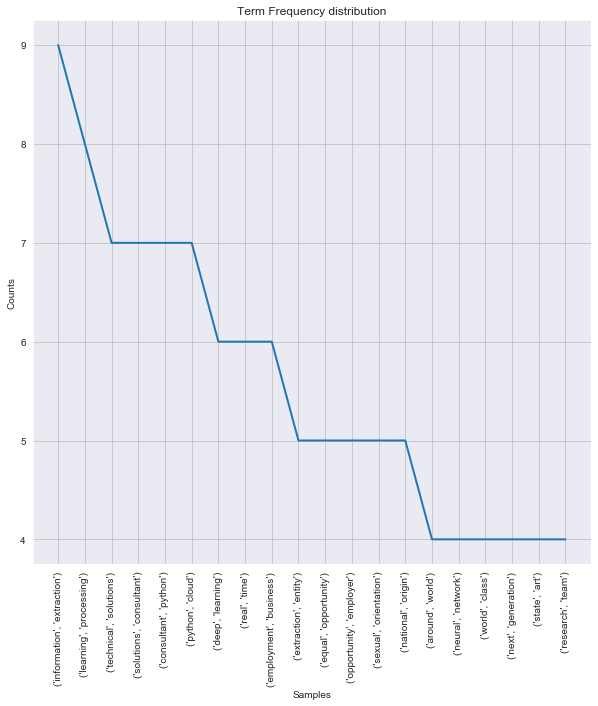

In [33]:
fn.plot_freqdist_from_series(nlp_df.job_descr, tokenizer, nlp_stop_word_lst, ngram_number=2) ;

* 'information extraction' is mentioned 9 times, and if we consider 'extraction entity' to be a similar concept, then the total is 14 occurrences.

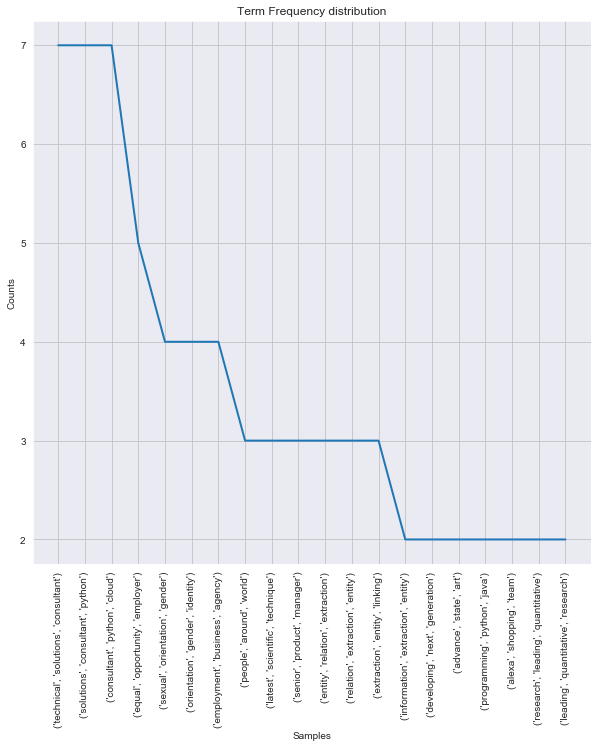

In [34]:
fn.plot_freqdist_from_series(nlp_df.job_descr, tokenizer, nlp_stop_word_lst, ngram_number=3);

* As was hinted in the bigram plot, the action/role of 'consultant' seems to feature fairly frequently in NLP jobs, occupying the first 3 trigrams in our last plot
* Entity extraction is featured significantly with 4 separate trigrams featuring it, with an accumulated frequency of 11 (however the frequency is still quite low for the individual trigrams).

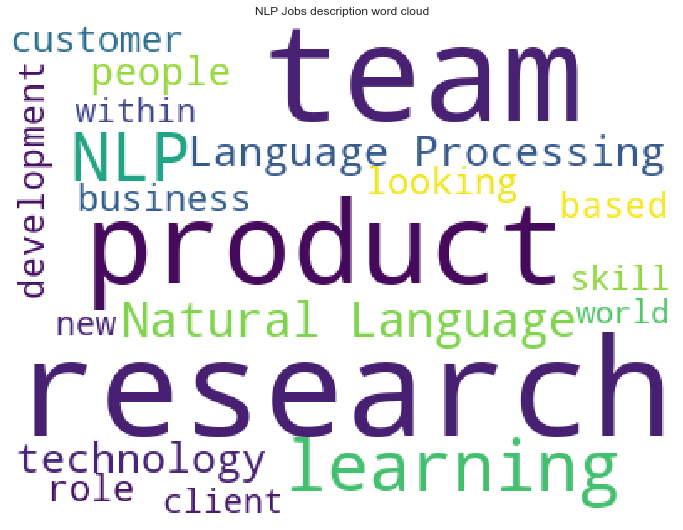

In [50]:
fn.gen_cloud(nlp_df.job_descr, 20, stop_word_lst, background_color='white', cloud_title='NLP Jobs description word cloud')

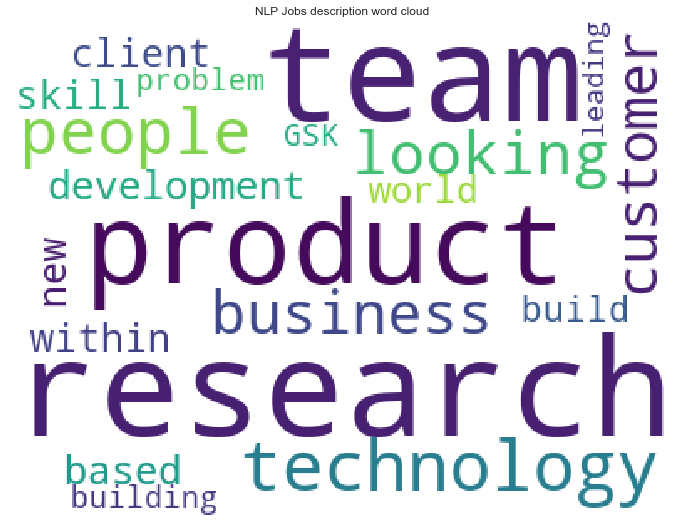

In [61]:
fn.gen_cloud(nlp_df.job_descr, 20, nlp_stop_word_lst,
             'white', cloud_title='NLP Jobs description word cloud')

### So far, the most promising leads for further exploration are:
- why and how do NLP jobs mention 'research' so heavily and how to capitalise on this?
- how do theses frequencies compare with 123-wide pool of jobs that mention 'NLP' inside their description but not in their title?

In [68]:
for i in range(len(nlp_df)):
    print('Job descr nr #', i+1)
    print(nlp_df.job_descr.iloc[i])
    print('\n\n\n')

Job descr nr # 1
specialise and differentiate our ability extract information and from unstructured text work with blend open source framework and build proprietary algorithm alongside and top these Our work relies the latest innovation the field reading researching and prototyping you are interested industrial scale applied NLP then would love talk you This developer role and you would have some prior experience developing system round Information extraction entity relationship entity resolution entity matching text summarisation and near duplicate detection 




Job descr nr # 2
Facebook mission give people the power and bring the world closer together Through our family apps and service building different kind billion people around the world give them way share what matter most them and help bring people closer together Whether creating new product helping small business expand reach people Facebook are builder heart Our global team iterating solving problem and working together emp

In [74]:
nlp_df['mentions_research'] = nlp_df.job_descr.apply(lambda x : len(re.findall('research', x)))

In [75]:
nlp_df.head()

,company,job_title,job_descr,job_search_term,job_location,job_url,salary_from_page_source_as_stated,salary_from_page_source_conv_hourly,salary_from_page_source_time_period,Num_reviews,title_inc_nlp,mentions_research
2,Digital insight-London N1,Natural Language Processing (NLP),specialise and differentiate our ability extra...,natural language processing,London,https://www.indeed.co.uk/rc/clk?jk=bfd3b0a1b6f...,NaN,NaN,NaN,NaN,1,1
3,Facebook-London,"Research Scientist, Natural Language Processin...",Facebook mission give people the power and bri...,natural language processing,London,https://www.indeed.co.uk/rc/clk?jk=2e174837e3a...,NaN,NaN,NaN,579.0,1,6
4,Evi Technologies Limited-London,Applied Scientist - Information Retrieval and ...,Machine Learning related disciplineStrong publ...,natural language processing,London,https://www.indeed.co.uk/rc/clk?jk=edc11c5d777...,NaN,NaN,NaN,63542.0,1,5
5,G-Research-London,Quantitative Researcher in Natural Language Pr...,Imagine introducing the next generation techno...,natural language processing,London,https://www.indeed.co.uk/rc/clk?jk=744713011b6...,NaN,NaN,NaN,9.0,1,6
6,Imperial College London-South Kensington,Research Fellow in Natural Language Processing,Are you excellent data scientist with clear re...,natural language processing,London,https://www.indeed.co.uk/rc/clk?jk=aef1fe9f820...,53988.0,NaN,NaN,154.0,1,16


In [76]:
nlp_df.mentions_research.value_counts()

1     5
6     3
0     3
2     2
16    1
5     1
4     1
3     1
Name: mentions_research, dtype: int64

It would seem that almost half of the mentions of 'research' come from one particular job post, which is...

In [80]:
print(nlp_df.loc[nlp_df.mentions_research==16].job_descr.iloc[0])

Are you excellent data scientist with clear research vision looking secure personal fellowship and establish your own research group The Data Science Institute DSI Imperial College wish nurture the next generation outstanding researcher and invite application for attractive and flexible fellowship scheme for those wishing develop independent research career You will carry out plan and lead high quality programme research Natural Language Processing and application undertake project management and supervise multi disciplinary team addition the Fellow will expected submit publication refereed journal and attract external research funding Duties and responsibility and original research Natural Language Processing and application obtain research grant from national and international funding body and obtain funding from industry where appropriate publish research paper peer reviewed journal attend and present research supervise postdoctoral researcher postgraduate student and undergraduate 

.. unsurprisingly it's the job post from Imperial College London, which is specifically looking for a `Research Fellow`. 

In [81]:
print(nlp_df.loc[nlp_df.mentions_research==16].job_title.iloc[0])

Research Fellow in Natural Language Processing


What if we look at the 3 jobs posts that mention research 6 times?
Well, below, you can see that: 
* 

In [84]:
for i in range(3):
    print(nlp_df.loc[nlp_df.mentions_research==6].job_descr.iloc[i])
    print('\n\n\n')

Facebook mission give people the power and bring the world closer together Through our family apps and service building different kind billion people around the world give them way share what matter most them and help bring people closer together Whether creating new product helping small business expand reach people Facebook are builder heart Our global team iterating solving problem and working together empower people around the world meaningful way Together can help people build just getting Billions people use our service their preferred language but many these language lack traditional NLP resource and our system need robust the informal tone slang and typo often found Our research span multiple area across NLP and machine learning including deep learning neural network machine translation natural language understanding and generation low resource NLP question answering dialogue and cross lingual and cross domain transfer learning are seeking world class natural language processin

In [85]:
nlp_skill_df = df.loc[df.title_inc_nlp == 0]
nlp_skill_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106 entries, 0 to 122
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   company                              106 non-null    object 
 1   job_title                            106 non-null    object 
 2   job_descr                            106 non-null    object 
 3   job_search_term                      106 non-null    object 
 4   job_location                         106 non-null    object 
 5   job_url                              106 non-null    object 
 6   salary_from_page_source_as_stated    22 non-null     float64
 7   salary_from_page_source_conv_hourly  0 non-null      float64
 8   salary_from_page_source_time_period  0 non-null      float64
 9   Num_reviews                          46 non-null     float64
 10  title_inc_nlp                        106 non-null    int64  
dtypes: float64(4), int64(1), object(

In [86]:
nlp_skill_df['mentions_research'] = nlp_skill_df.job_descr.apply(lambda x : len(re.findall('research', x)))
nlp_skill_df.mentions_research.value_counts()

0     58
1     20
3      5
2      5
9      4
6      3
5      3
12     2
10     2
16     1
8      1
7      1
4      1
Name: mentions_research, dtype: int64

'Research' is still quite prominent even within this group, although more than half of the descriptions in this subset do not mention it at all and one post mentioning it 16 times (which happens to be, again a ) 

In [91]:
nlp_skill_df.loc[nlp_skill_df.mentions_research==16].job_descr.iloc[0]

'Job Requisition 20WD42011 Position Overview The User Interface Research Group Autodesk Research seeking exceptionally talented research scientist work research the intersection Human Computer Interaction and Artificial Intelligence include research topic such intelligent user interface adaptive and personalized user interface novel approach into software application technique for providing insight user based usage data end user machine learning other novel technique for interacting with system human robot interaction and natural language processing Successful candidate will have demonstrated track broadly research result and publication venue ACM CHI UIST IUI NeurIPS AAAI similar Responsibilities The overall mission the User Interface Research Group apply Human Computer Interaction expertise develop fundamental understanding how human perceive learn and interact with technology and based these understanding develop novel interface and visualizationsto solve current problem explore fut

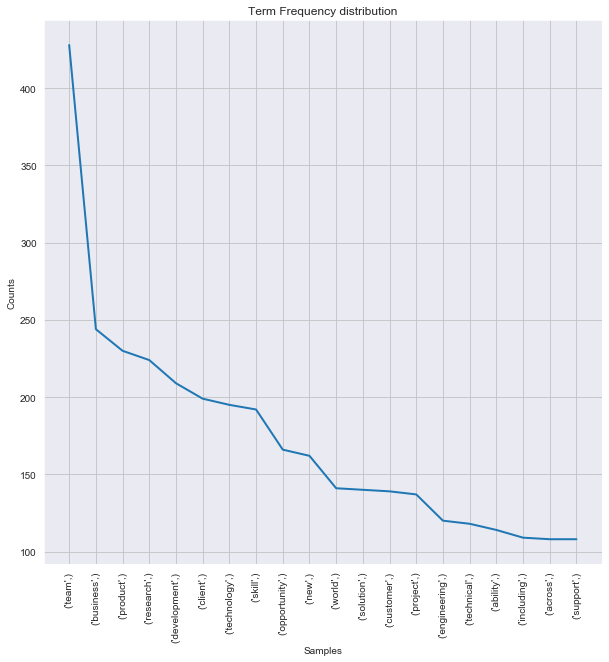

In [87]:
fn.plot_freqdist_from_series(nlp_skill_df.job_descr, tokenizer, nlp_stop_word_lst, ngram_number=1);

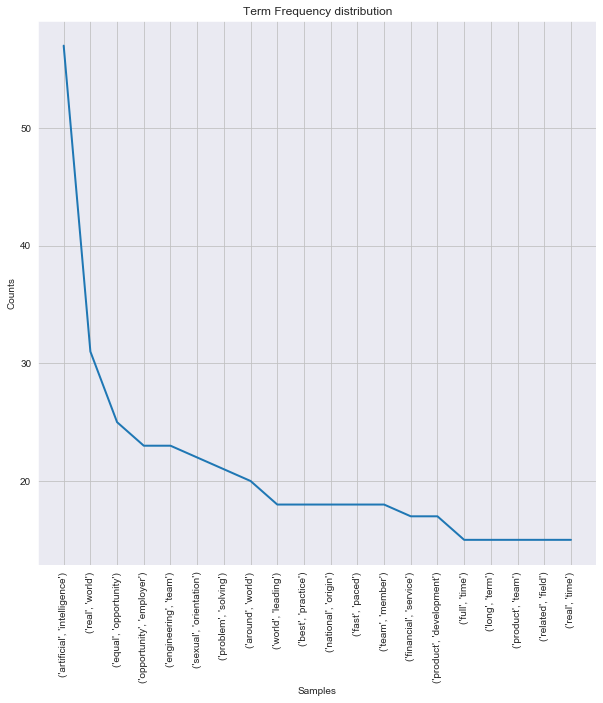

In [88]:
fn.plot_freqdist_from_series(nlp_skill_df.job_descr, tokenizer, nlp_stop_word_lst, ngram_number=2);

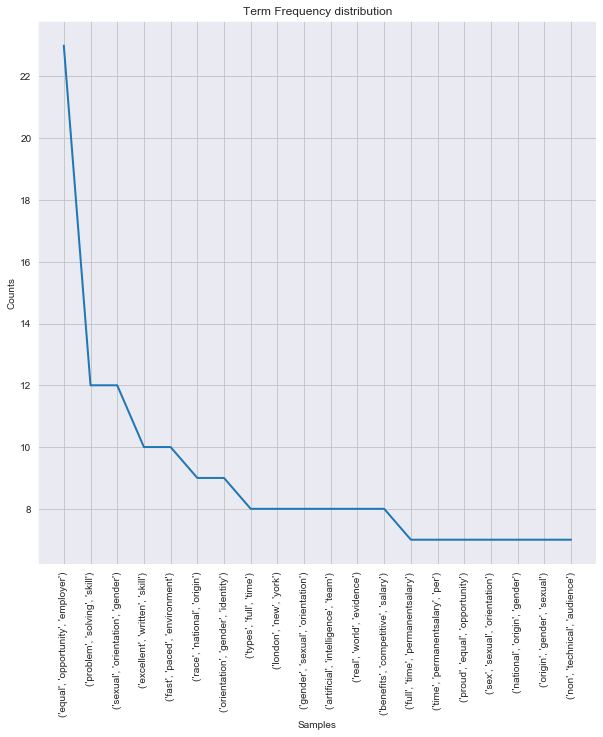

In [89]:
fn.plot_freqdist_from_series(nlp_skill_df.job_descr, tokenizer, nlp_stop_word_lst, ngram_number=3);

<a id=conc ><a/> 

## 3. Summary of findings
    
[LINK to table of contents](#contents)